In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

## Analysis of Latent Space

In [25]:
columns = ["latent_space_0","latent_space_1","latent_space_2","latent_space_3","latent_space_4",
           "latent_space_5","latent_space_6","anomaly"]
prediction_1 = pd.read_csv("../../visualisation/files/prediction/multi_task_phm_1.csv", sep=";")
total = prediction_1[columns]

In [26]:
total.head()

,latent_space_0,latent_space_1,latent_space_2,latent_space_3,latent_space_4,latent_space_5,latent_space_6,anomaly
0,-0.159606,-0.042407,-0.071065,0.130697,-0.289689,-0.607687,-0.559355,0
1,-0.159495,-0.042505,-0.071027,0.130566,-0.289321,-0.607222,-0.559496,0
2,-0.159308,-0.042529,-0.071063,0.130594,-0.289231,-0.606897,-0.559764,0
3,-0.159348,-0.042482,-0.071141,0.130676,-0.289451,-0.607164,-0.559674,0
4,-0.159344,-0.042569,-0.071194,0.130656,-0.289242,-0.607129,-0.559811,0


In [28]:
latent_space = total.iloc[:,0:7]

In [32]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(latent_space)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', "pc4", "pc5"])
status = total["anomaly"]
finalDf = pd.concat([principalDf, status], axis = 1)
finalDf.head()

,pc1,pc2,pc3,pc4,pc5,anomaly
0,-0.311557,-0.756562,0.190697,-0.170719,0.086442,0
1,-0.310980,-0.756365,0.190677,-0.170799,0.086270,0
2,-0.310568,-0.756427,0.190464,-0.170836,0.086244,0
3,-0.310917,-0.756532,0.190429,-0.170823,0.086337,0
4,-0.310742,-0.756553,0.190491,-0.170999,0.086301,0


### Visualisation of Principal Component 4 and 5
The Blue Points are ground truth (anomaly points)

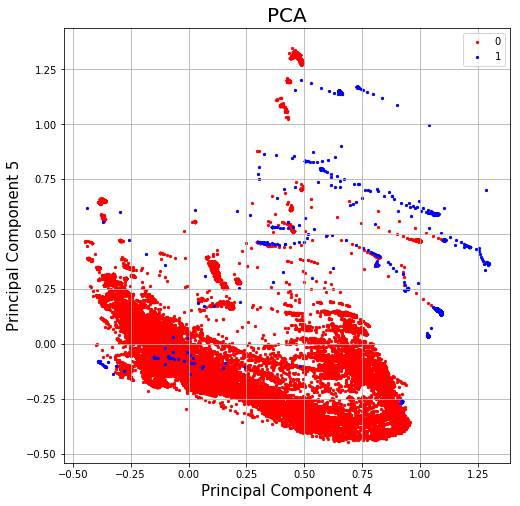

In [35]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 4', fontsize = 15)
ax.set_ylabel('Principal Component 5', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0, 1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['anomaly'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc4']
               , finalDf.loc[indicesToKeep, 'pc5']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

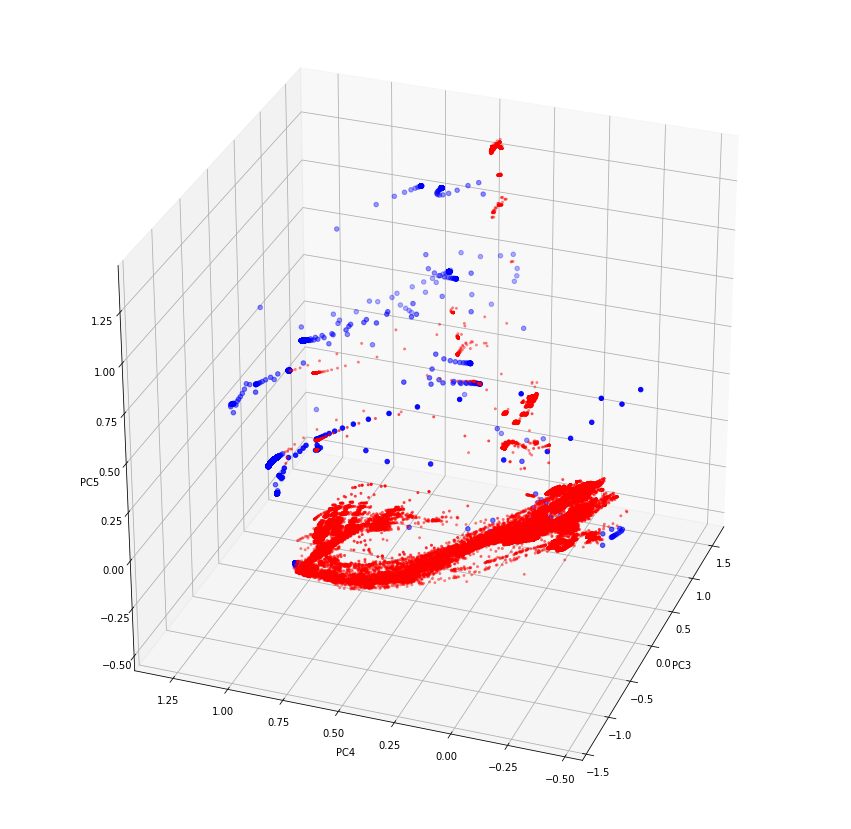

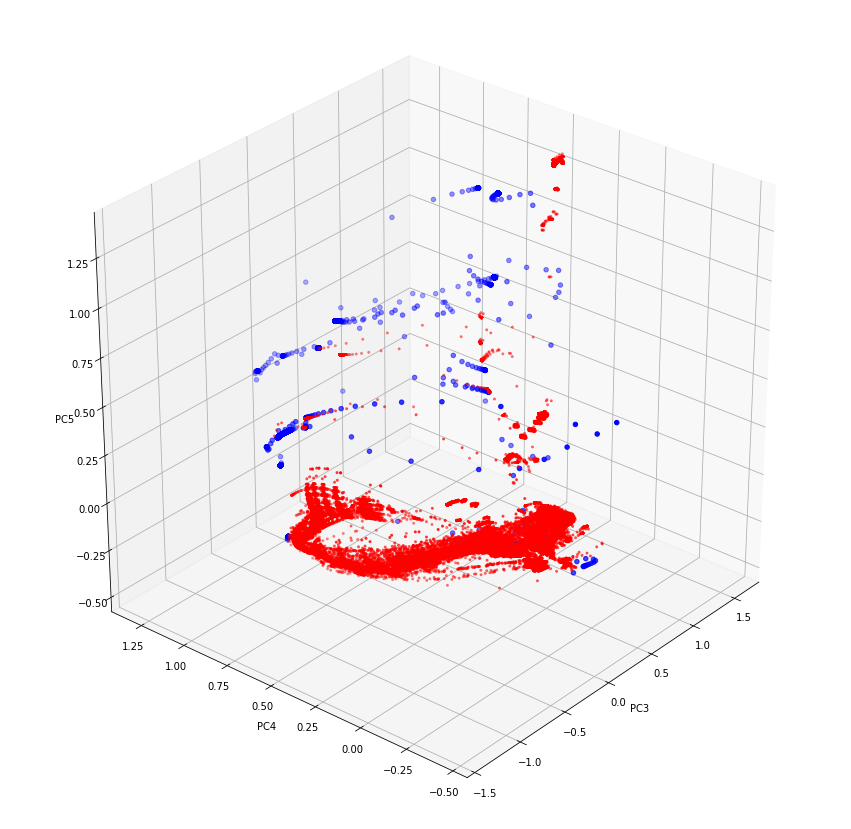

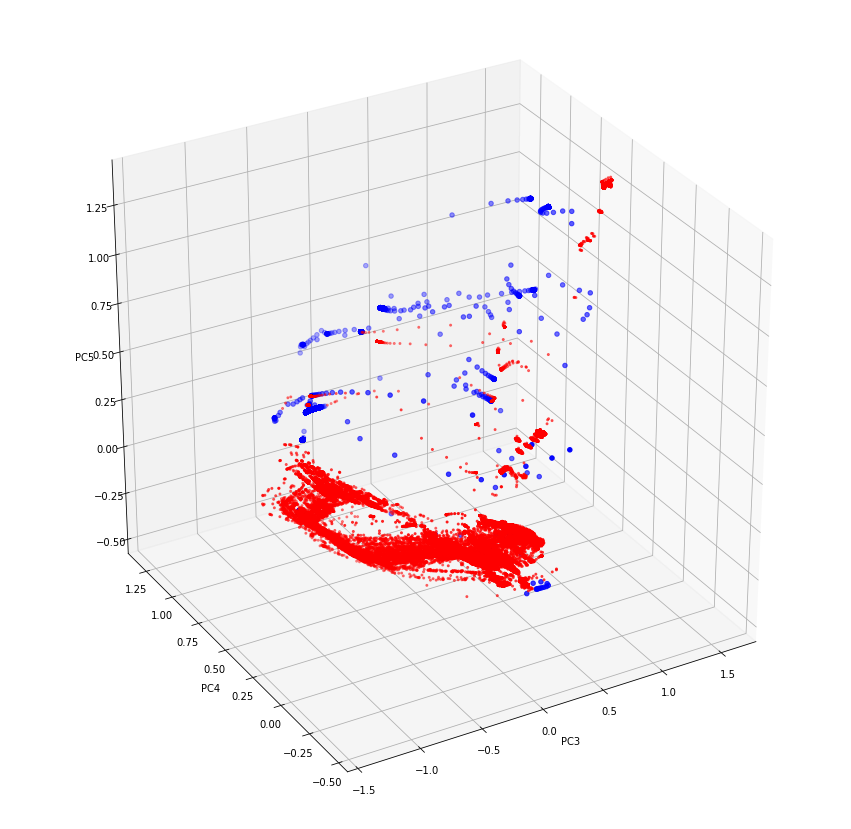

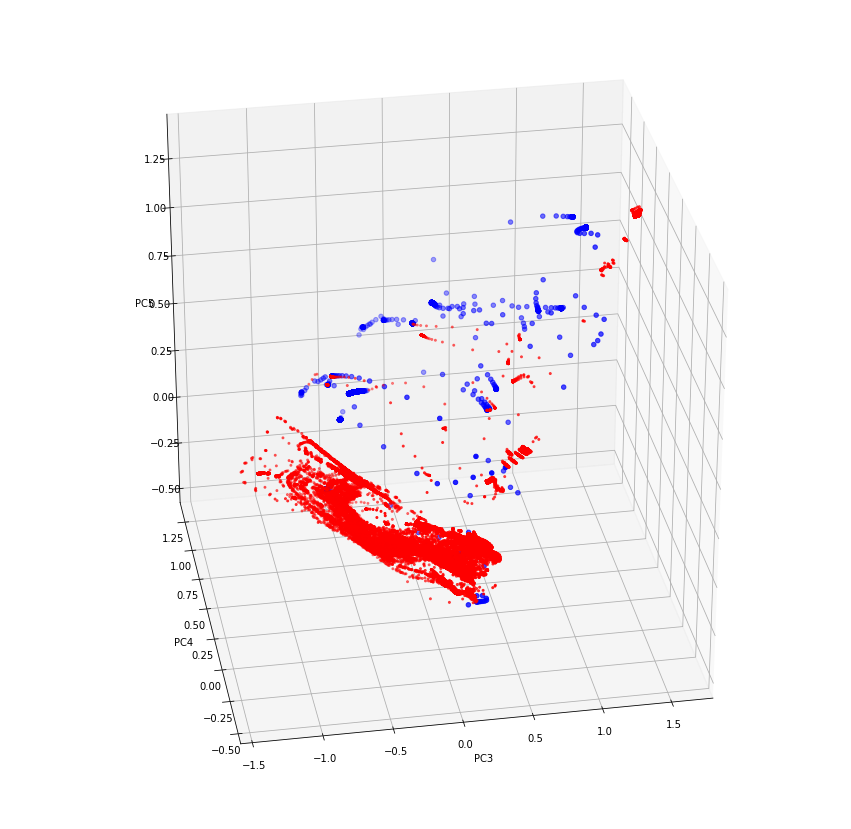

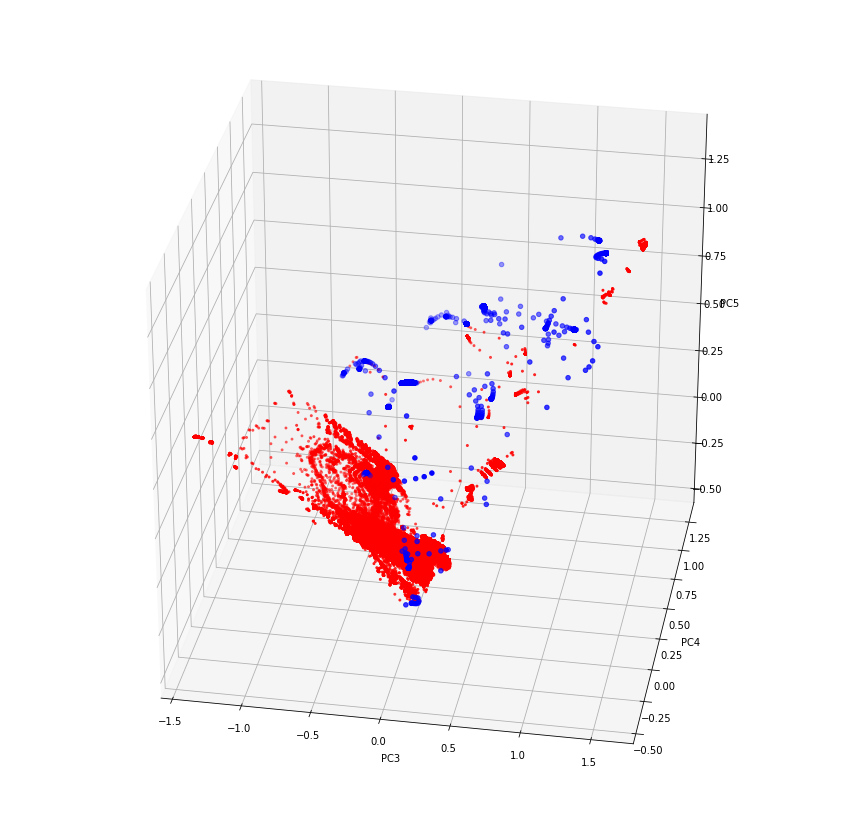

In [38]:
for i in range(200,300,20):
    fig = plt.figure()
    fig.set_figheight(15)
    fig.set_figwidth(15)
    ax = fig.add_subplot(111, projection='3d')
    targets = [0, 1]
    colors = ['r','b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['anomaly'] == target
        if target == 1:
            size = 20
        else:
            size = 4
        xs = finalDf.loc[indicesToKeep, 'pc3']
        ys = finalDf.loc[indicesToKeep, 'pc4']
        zs = finalDf.loc[indicesToKeep, 'pc5']
        ax.scatter(xs, ys, zs, c = color, s = size)
        ax.view_init(azim=i)       

    ax.set_xlabel('PC3')
    ax.set_ylabel('PC4')
    ax.set_zlabel('PC5')
    plt.show()


## Distance Measurements

In [ ]:
# vector of word hochzeit:
word_hochzeit = df_7_dim.loc["blutkreislauf",:].values
distance_df = pd.DataFrame(columns=["distance to _blutkreislauf_"])

for index, word in df_7_dim.iterrows():
    distance_pair = distance.euclidean(word_hochzeit, word.values)
    df = pd.DataFrame(distance_pair, columns=["distance to _blutkreislauf_"], index= [word.name])
    distance_df.append(df)

-- 